### Tarea de SVM

##### Estudiante : Juan Francisco Clavijo Monroy 

### ¿Porque el codigo no funciona ?

 A continuacion veremos el codigo dado por el profesor y analizaremos
 varias lineas e intentaremos observar  lo mejor posible lo que se esta realizando.

Ademas trate de realizar unos cambios que dejo como comentarios tratando que funcionando de la manera que considere que podria ser una alternativa adecuada.

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt #  se utiliza en Python para importar 
                                #  la biblioteca de visualización de gráficos Matplotlib.
                                #  Permite crear gráficos en 2D y 3D, histogramas, gráficos de dispersión,
                                #  diagramas de barras, 
                                #  gráficos de contorno, mapas de calor y muchos otros tipos de gráficos
                                #  Y le coloca un alias que sera plt para llamar mas rapido la funcion
from matplotlib import style    #permite importar un estilo específico que se puede utilizar para personalizar los gráficos.
import numpy as np              #  proporciona una gran cantidad de funciones para trabajar con matrices y arreglos 
                                #  multidimensionales.
style.use('ggplot')             # muestra el estilo que vamos a utilizar

# para lo siguiente class support vector machine
# Es una técnica de aprendizaje que busca encontrar el hiperplano que mejor divide las clases
# en un espacio multidimensional.
# def __init__(self, visualization=True) 
# se utiliza para inicializar los atributos de una clase y el parámetro "visualization" 
# se utiliza para determinar si se desea mostrar visualmente los resultados de la clasificación de datos.
class Support_Vector_Machine:
    def __init__(self, visualization=True):
#la instancia de la clase tenga una propiedad que determine si se mostrarán o no los resultados de la clasificación.
# si es True se muestran "se visualizan" y si es False no.
        self.visualization = visualization
#En el código que utilizó self.colors = {1:'r',-1:'b'}, se está asignando el color 'r' a la clase 1 y el color 'b'
#a la clase -1. Esto significa que, en una visualización, los puntos de datos con etiqueta 1 se mostrarán en rojo
#y los puntos de datos con etiqueta -1 se mostrarán en azul.
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure() # La primera línea crea una nueva figura de 
                                    # visualización utilizando la función plt.figure()
            self.ax = self.fig.add_subplot(1,1,1) # agrega un nuevo subplot a la figura utilizando el método add_subplot() 
                                                  # de la figura
#El método add_subplot() toma tres argumentos que especifican la disposición del subplot en la figura:
#el número de filas, el número de columnas y el índice del subplot.
#en este caso una fila una columna 
    # train
    def fit(self, data):
        self.data = data #  "data" sea un diccionario donde cada clave representa una clase y el valor asociado es
                         #   una lista de características de entrenamiento
        # { ||w||: [w,b] }
        opt_dict = {}    # es un diccionario que se utiliza para almacenar los vectores de soporte óptimos 
                         # encontrados durante el entrenamiento
#Ahora para transforms es una lista de posibles transformaciones para aplicar a los vectores de soporte.
# voy a cambiar estas transformaciones para el ejercicio deseado 
# Coloque dos unos al final de la transformacion para que cuadrara la dimension 
        transforms = [[1,1,1,1],
                      [-1,1,1,1],
                      [-1,-1,1,1],
                      [1,-1,1,1],
                      [1,1,1,-1],
                      [1,-1,1,-1],
                      [1,-1,-1,1],
                      [-1,-1,-1,-1]
                      ]    
#Para que estuvieran todas las transformaciones deberian aparecer las 16 posibilidades de las permutaciones de 
# 1 y -1 en las 4 espacios de vector de 4 
#"all_data" es una lista que contiene todas las características de entrenamiento de todas las instancias de todas las clases.
#Se utiliza para determinar los valores máximos y mínimos de las características, que se utilizan más adelante 
#en el proceso de normalización.

# Ahora tenemos 3 for 
# el primero recorre la primera fila la cual es donde se describe las caracteristicas del o nuestro vector de X
# el segundo for hace que nuestros datos que estan en las diferentes columnas sean colocados todos en una sola columna
# el tercer for lee lo que esta en la primera fila y la primera columna lo cual nos dara un error si este valor es un
# numero decimal.
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
# aca lo que tenemos un valor maximo y un valor minimo de la data  
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        # Aca lo que se observa es que se tienen 3 escalas de paso para mirar 
        # que tan grande o tan pequeño se quiere dar el paso y como manejarlo 
        # teniendo como referente que el 0.001 es el que mas lento se va a mover

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]
        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
#para el siguiente for cada valor en esta lista representa el tamaño del paso que se utilizará para actualizar el vector de pesos w durante la optimización
#tomando el 0.1,0.01 y 0.001 que mencionamos anteriormente en el step_sizes
        for step in step_sizes:
          #Ahora el W va inicializar con dos valores que son los mas optimos 
            w = np.array([latest_optimum,latest_optimum,latest_optimum,latest_optimum])#Voy a agregar dos latest_optimum
            # we can do this because convex
            #hasta aca va bien [179.274 179.274] son los optimos
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),# es un producto de (-1*17.9274*5,17.9274*5,step=1.79274*5)
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        #print(w_t),print(w)
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # print("vamos bien")
                                # Verifiy constraints
                                #print(b) b=-89.637
                                #print(xi) [-1.3971  3.3191 -1.3927 -1.9948]
                                #print(w_t) [179.274 179.274] -----  ------
                                #como observamos el producto punto nos genera un inconveniente al no tener las dimensiones adecuadas para multiplicar
                                if not (yi*(np.dot(w_t,xi)+b)) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            #print(norms) me esta tirando vacio
            opt_choice = opt_dict[norms[0]]# este es otro problema  que me genera
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = data_bien #{-1:np.array([[1,7],
                          #[2,8],
                          #[3,8],]),
             
            # 1:np.array([[5,1],
                         #[6,-1],
                         #[7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)


Aparte de los errores que menciono en el codigo creo que tambien se da un problema de generalizacion.

para las listas sugeridas para el data_dict intente crear unas para la parte que considere conveniente veamos 

In [2]:
import pandas as pd
import numpy as np #  proporciona una gran cantidad de funciones para trabajar con matrices y arreglos 
                   #  multidimensionales.
import os
os.chdir(r'C:\Users\User\OneDrive - Universidad Nacional de Colombia\Escritorio\Machine Learning')

In [3]:
df = pd.read_csv('data_banknote_authentication.txt', sep =',')

In [4]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
datos_1=df[df['class']==1]
datos_0=df[df['class']==0]
datos_1 = datos_1.drop(['class'], axis= 1)
datos_0 = datos_0.drop(['class'], axis= 1)

lista_mayor = []
for i in range(datos_1.shape[0]):
    lista_mayor.append([])
    for j in range(datos_1.shape[1]):
        fila = datos_1.iloc[i,j]
        lista_mayor[i].append(fila)

lista_mayor2 = []
for i in range(datos_0.shape[0]):
    lista_mayor2.append([])
    for j in range(datos_0.shape[1]):
        fila = datos_0.iloc[i,j]
        lista_mayor2[i].append(fila)

lista_mayor = np.array(lista_mayor)
lista_mayor2 = np.array(lista_mayor2)

data_bien = {-1 : lista_mayor, 1:lista_mayor2}

data_bien nos da una lista que son los datos por filas que era lo que se quiere en data_dict

Ahora veremos brevemente los datos e informacion que podria ser relevante para nosotro debido a que nos esta dando una idea del comportamiento de los datos como son su maximo, su minimo algunos cuartiles entre otros.

In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Veamos cual es nuestro objetivo :  Especifique qué problema de Machine Learning está resolviendo
Considero que el problema que se quiere resolver es que dada un base de datos necesitamos ver si el billete que estamos metiendo en nuestra es real o es falso y pues lo que se quiere es que la ML nos clasifique bien ademas que tenemos otras variables que nos van a ayudar a tomar esta decision

### características y las etiquetas en las que está trabajando.

Para la varianza veamos algunas de sus caracteristicas 

In [7]:
variance=df.iloc[:, 0]
import matplotlib.pyplot as plt

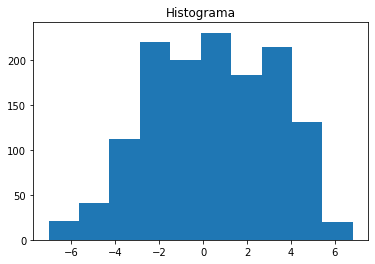

In [8]:
plt.hist(variance,bins = 10) # bins el numero de divisiones del histograma
plt.title("Histograma");


Al parecer la mayoria de datos se encuentran entre -2 y 2. Veamos si el boxplot nos muestra algun dato atipico.

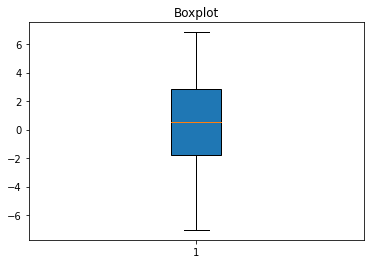

In [9]:
plt.boxplot(variance,vert=True,patch_artist=True);
plt.title("Boxplot");

Lo que obsevamos en el boxplot es que no tenemos datos atipicos.

In [10]:
skewness=df.iloc[:, 1]
import matplotlib.pyplot as plt

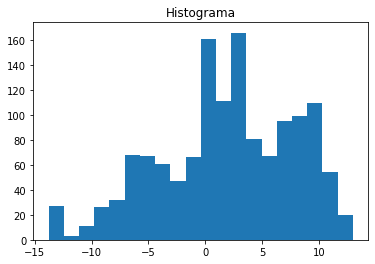

In [11]:
plt.hist(skewness,bins = 20) # bins el numero de divisiones del histograma
plt.title("Histograma");

Vemos que la mayor cantidad de datos se encuentran entre (0,5)

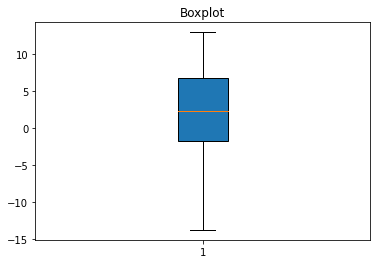

In [12]:
plt.boxplot(skewness,vert=True,patch_artist=True);
plt.title("Boxplot");

No observamos ningun dato atipico en esta variable.

In [13]:
curtosis=df.iloc[:, 2]
import matplotlib.pyplot as plt

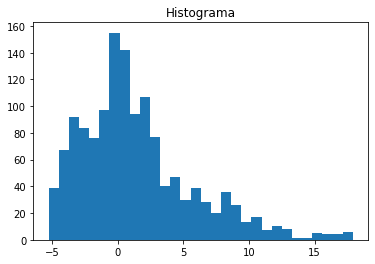

In [14]:
plt.hist(curtosis,bins = 30) # bins el numero de divisiones del histograma
plt.title("Histograma");

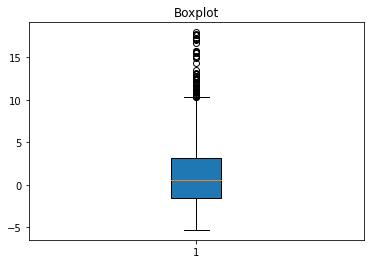

In [15]:
plt.boxplot(curtosis,vert=True,patch_artist=True);
plt.title("Boxplot");

Observamos varios datos atipicos que se posicionan en el bigote superior, teniendo una mediana cercana a cero con valores superiores al tercer cuartil.

In [16]:
entropy=df.iloc[:, 3]
import matplotlib.pyplot as plt

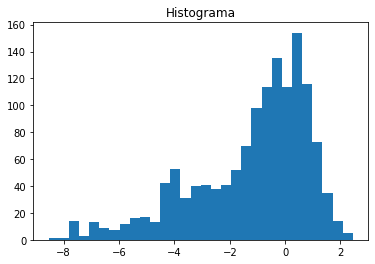

In [17]:
plt.hist(entropy,bins = 30) # bins el numero de divisiones del histograma
plt.title("Histograma");

Datos importantes en el intervalo (-2,2) parece una grafica inclinada a la derecha.

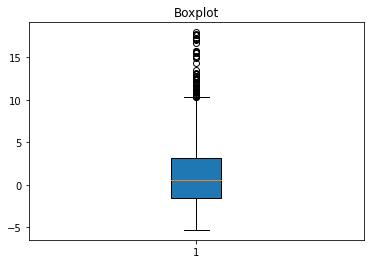

In [18]:
plt.boxplot(curtosis,vert=True,patch_artist=True);
plt.title("Boxplot");

Datos atipicos que sobre pasan el bigote superior desviado hacia los valores positivos de manera considerable.

### ¿Son estos conjuntos de datos linealmente separables?

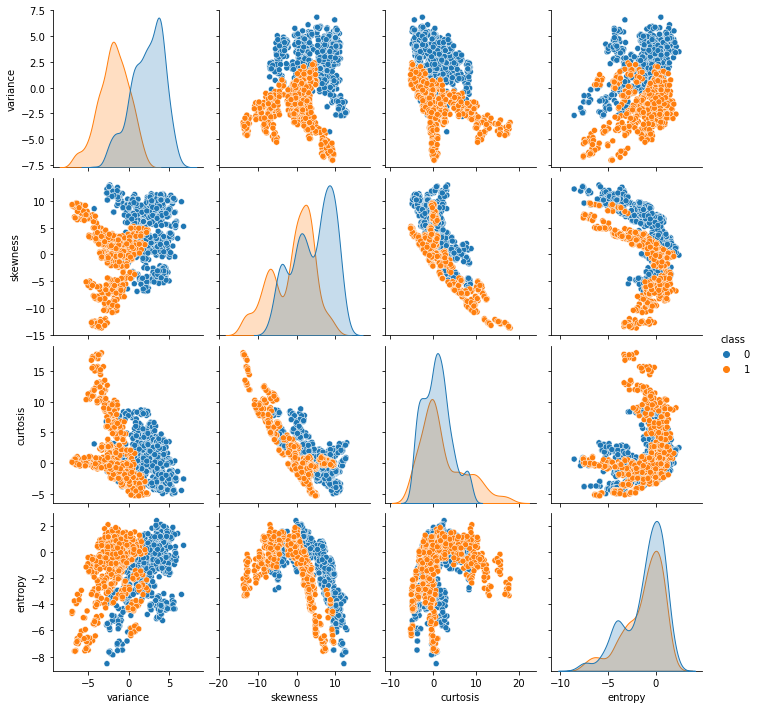

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, vars=['variance'
                       ,'skewness'
                       ,'curtosis'
                       ,'entropy']
             ,hue="class")


Este análisis que dibuja pares relacionados de variables para presentar un patrón de relación o de correlación salvo la de curtosis con entropy se pueden distinguis o separar linealmente como se puede observar puede ser que algunos puntos queden "mal" posicionados pero se podria dar una buena separación linea. 

###  ¿Se eligen estos conjuntos de datos al azar?

Pues para efectos del entrenamiento seria lo mas conveniente porque si se eligen de una cierta forma que la persona que esta haciendo el programa o el analisis esta modificando de cierta manera la información, estaria creando una especie de sesgo sobre los datos. Limitando el modelo a que pasen dos cosas o no generalice o se aprenda sobre los datos que le estoy permitiendo obtener

###  El tamaño de la muestra es suficiente para garantizar la generalización.

Pues tenemos una cantidad no mayor a 1372 lo cual no es muy grande pero pues asumimos que de alguna manera se escogió de la mejor manera posible porque recordemos que entre mayor sea la cantidad de datos que tenemos es muchisimo mas facil de trabajar , ademas que pues si contamos con una base de datos de 30 millones entonces pues es razonable tener una muestra que sea representativa de esta cantidad para poder entrenar y realizar como es debido los ejercicios, en cuyo caso se debe tener una cantidad para entrenamiento y otra para testeo. En nuestro caso podriamos realizar un 80% y un 20% o un 90% y un 10% pero pues como se menciono anteriormente si se tiene uno de 30M entonces pues un 99.9% y un 0.1% aunque parezca que se puede dar lugar a un sobre entrenamiento podria funcionar debido al coste computacional que esto requiere.

In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

El accuracy_score se utiliza para evaluar la precisión global de un modelo. Calcula el porcentaje de predicciones correctas que hace el modelo en todo el conjunto de datos.


El precision_score se utiliza para evaluar la precisión de las predicciones positivas de un modelo. Calcula el porcentaje de predicciones positivas que son verdaderas positivas.

In [22]:
X = df[['variance'
        ,'skewness'
        ,'curtosis'
        ,'entropy']]
y = df ['class']

X_train, X_test, y_train, y_test,=train_test_split(X,y,test_size=0.2,random_state=58)
#X_train y y_train son los subconjuntos que se utilizarán para ajustar el modelo de aprendizaje automático.
#lo que se hace es dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para pruebas con el 
#train_test_split.
#El test_size lo tome que fuera del 20%
#es una semilla utilizada para la generación de números aleatorios,
#con el objetivo de que la división sea reproducible en diferentes ejecuciones del código.
# es indiferente el numero que se coloque en random_state pero se debe mantener despues de ser elegido.

#Ahora toca hacerlo para las tres que necesitamos la Regresion logistica , la regresion lineal y la SVM
#
rlog = LogisticRegression ()
rlog.fit(X_train,y_train)
rlog_pred=rlog.predict(X_test)
rlog_acc=accuracy_score(y_test,rlog_pred)
rlog_pre=precision_score(y_test,rlog_pred)

#Ahora va la lineal %%%% no se si lo estoy considerando mal ...
#rli=LinearRegression()
#rli.fit(X_train,y_train)
#rli_pred=rli.predict(X_test)
#rli_acc=accuracy_score(y_test,rli_pred)
#rli_pre=precision_score(y_test,rli_pred)

#Ahora la SVM

y_train.replace(0,-1,inplace=True)
y_test.replace(0,-1,inplace=True)

SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train)
SVM_pred=SVM.predict(X_test)
SVM_acc=accuracy_score(y_test,SVM_pred)
SVM_pre=precision_score(y_test,SVM_pred)

Tabla = pd.DataFrame({'accuracy':[rlog_acc,SVM_acc],
                      'precision':[rlog_pre,SVM_pre]}, 
                       index=['regresionLog','SVM'])










In [23]:
Tabla

,accuracy,precision
regresionLog,0.996364,0.991667
SVM,0.992727,0.991597


Por lo que se puede ver se tienen un porcentaje del 99.6% y uno del 99.2% lo cual nos indica que en estas metricas de precision esta funcionando bastante bien

Ahora veamos lo que ocurre con la otra base de datos que nos fue proporcionada

In [24]:
df5 = pd.read_csv('datatest.txt', sep =',') # que es lo que necesitamos para el data test 

In [25]:
df5

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [26]:
df5.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [34]:
Temperature=df5.iloc[:, 1]
import matplotlib.pyplot as plt

In [35]:
Temperature

140     23.700000
141     23.718000
142     23.730000
143     23.722500
144     23.754000
          ...    
2800    24.290000
2801    24.330000
2802    24.330000
2803    24.356667
2804    24.408333
Name: Temperature, Length: 2665, dtype: float64

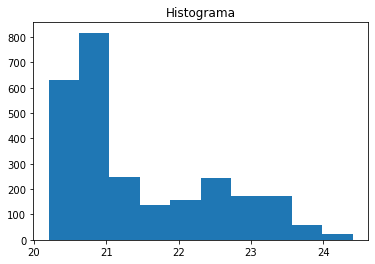

In [36]:
plt.hist(Temperature,bins = 10) # bins el numero de divisiones del histograma
plt.title("Histograma");


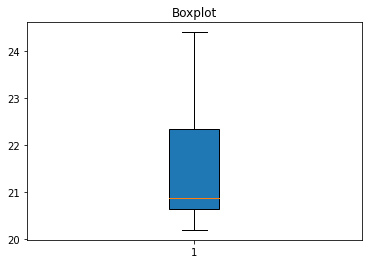

In [41]:
plt.boxplot(Temperature,vert=True,patch_artist=True);
plt.title("Boxplot");

In [37]:
Humidity=df5.iloc[:, 2]
import matplotlib.pyplot as plt

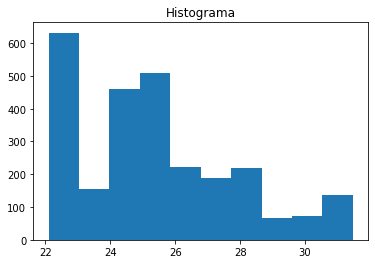

In [38]:
plt.hist(Humidity,bins = 10) # bins el numero de divisiones del histograma
plt.title("Histograma");


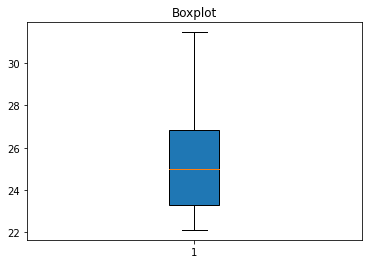

In [40]:
plt.boxplot(Humidity,vert=True,patch_artist=True);
plt.title("Boxplot");

In [42]:
Light=df5.iloc[:, 3]
import matplotlib.pyplot as plt

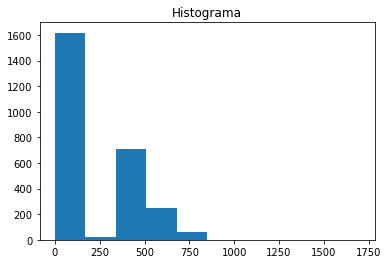

In [43]:
plt.hist(Light,bins = 10) # bins el numero de divisiones del histograma
plt.title("Histograma");

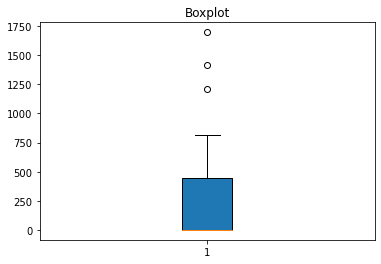

In [48]:
plt.boxplot(Light,vert=True,patch_artist=True);
plt.title("Boxplot");

Encontramos que hay 3 datos atipicos que se dirigen a valores positivos sobre el bigote superior , son datos que se deben tener en cuenta para tomar decisiones o para mirar el comportamiento si encontramos que nos esta dando resultados un poco alterados.

In [44]:
CO2=df5.iloc[:, 4]
import matplotlib.pyplot as plt

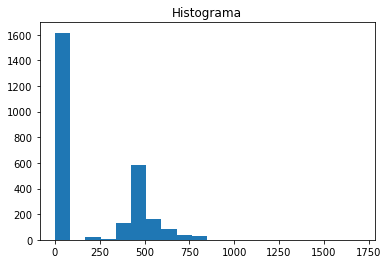

In [47]:
plt.hist(Light,bins = 20) # bins el numero de divisiones del histograma
plt.title("Histograma");

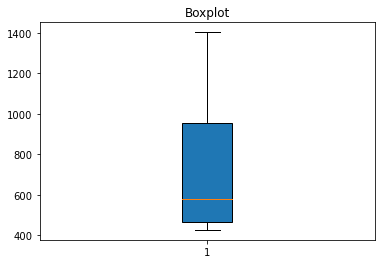

In [46]:
plt.boxplot(CO2,vert=True,patch_artist=True);
plt.title("Boxplot");

In [49]:
HumidityRatio=df5.iloc[:, 5]
import matplotlib.pyplot as plt

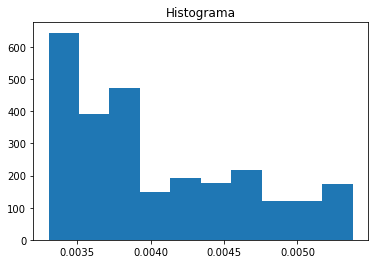

In [51]:
plt.hist(HumidityRatio,bins = 10) # bins el numero de divisiones del histograma
plt.title("Histograma");


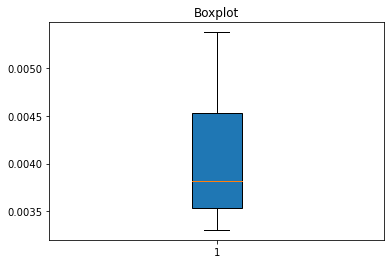

In [52]:
plt.boxplot(HumidityRatio,vert=True,patch_artist=True);
plt.title("Boxplot");

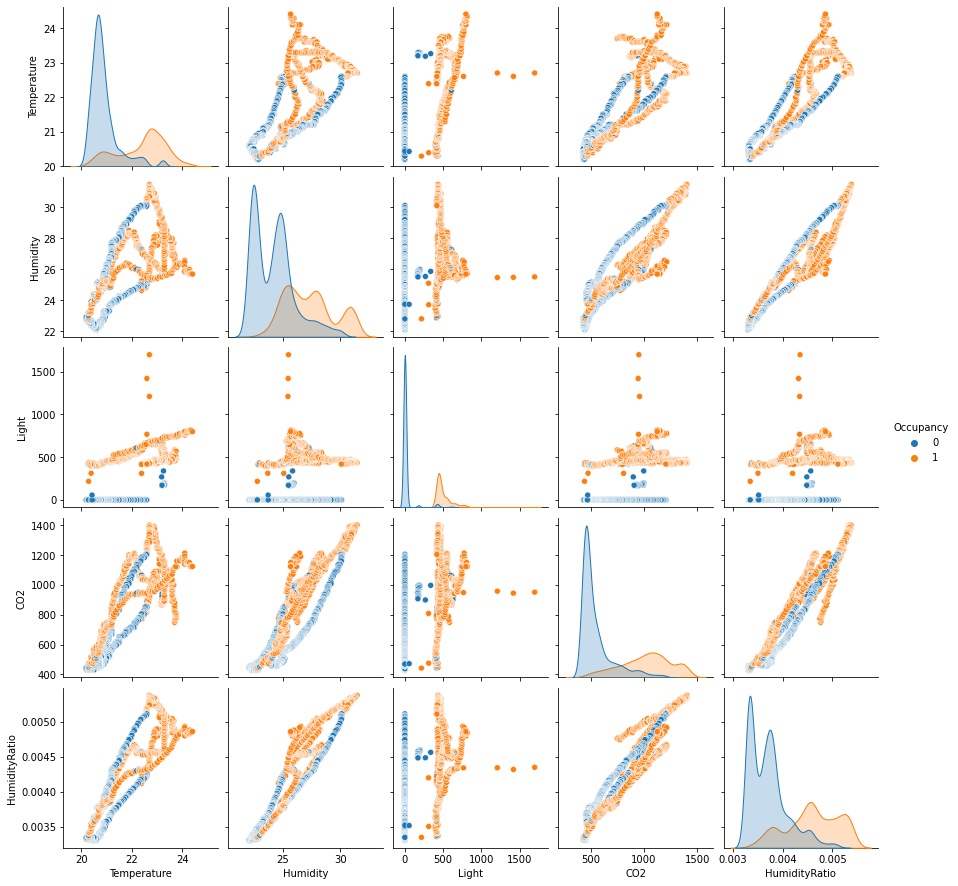

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df5, vars=['Temperature'
                       ,'Humidity'
                       ,'Light'
                       ,'CO2'
                       ,'HumidityRatio']
                     ,hue="Occupancy")

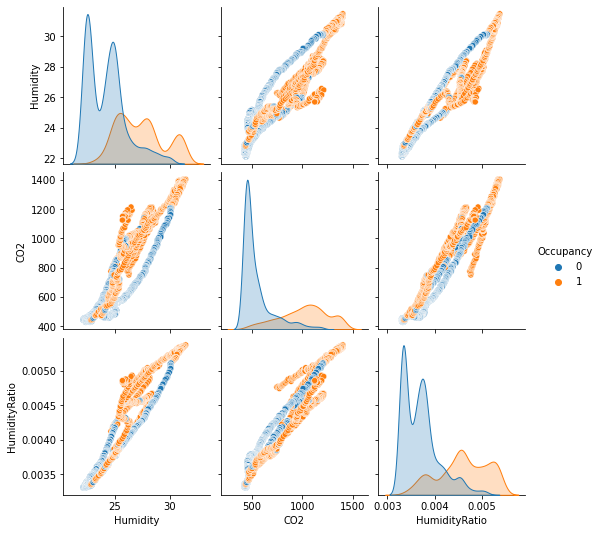

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df5, vars=['Humidity'
                       ,'CO2'
                       ,'HumidityRatio']
                     ,hue="Occupancy")

Vemos que se tiene bastante correlacion entre las distintas variables lo cual no genera conflicto a la hora de separar linealmente , tambien consideramos mirar cuales eran las variables mas y realizamos nuevamente el pairplot para mirar como se veian y este fue el resultado.

Vamos a ver ahora como se comporta 

In [63]:
X = df5[['Temperature'
        ,'Humidity'
        ,'CO2'
        ,'HumidityRatio']]
y = df5['Occupancy']

X_train, X_test, y_train, y_test,=train_test_split(X,y,test_size=0.2,random_state=58)

rlog = LogisticRegression ()
rlog.fit(X_train,y_train)
rlog_pred=rlog.predict(X_test)
rlog_acc=accuracy_score(y_test,rlog_pred)
rlog_pre=precision_score(y_test,rlog_pred)

y_train.replace(0,-1,inplace=True)
y_test.replace(0,-1,inplace=True)

SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train)
SVM_pred=SVM.predict(X_test)
SVM_acc=accuracy_score(y_test,SVM_pred)
SVM_pre=precision_score(y_test,SVM_pred)

Tabla2 = pd.DataFrame({'accuracy':[rlog_acc,SVM_acc],
                      'precision':[rlog_pre,SVM_pre]}, 
                       index=['regresionLog','SVM'])

In [64]:
Tabla

,accuracy,precision
regresionLog,0.902439,0.880682
SVM,0.917448,0.890110
